# 神经网络
## 神经网络的原理
线性模型的一般预测公式如下:
$$ \hat{y} = w_0x_0 + w_1x_1 + \cdots + w_nx_n + b $$
其中$\hat{y}$表示对y的估值，$x_0$到$x_n$是样本特征值，w是权重。$\hat{y}$可以视为所有特征值的加权求和，如下图所示:

<img src="MPL-1.png" width="480">

在MLP模型中，算法在过程里添加了隐藏层(Hidden Layers)，然手隐藏层重复进行上述加权求和计算，最后再把隐藏层所计算的结果用来生成最终结果，如下图：

<img src="MPL-2.png" width="480">

如此一来，模型要学习的特征系数会很多，每个输入特征和隐藏单元(hidden unit)之间都有系数。
从数学角度说，如果隐藏层只是进行加权求和，得到的结果和普通线性模型不会有太多不同，因此我们生成隐藏层之后，要对结果进行非线性矫正(rectifying nonlinearity)，简称relu(rectified linear unit)，或者进行双曲正切处理(tangens hyperbolicus)，简称tanh，或者进行逻辑斯谛矫正(logistic)通过图像展示如下:

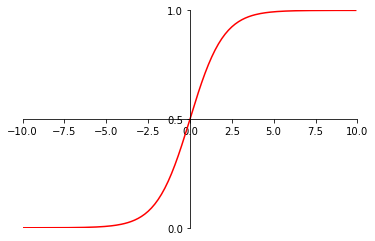

In [1]:
# coding=utf-8
from matplotlib import pyplot
import numpy as np
# sigmoid function
# logistic函数及其导数形式的合并函数
def sigmoid(x,deriv=False):
    if(deriv):
        return x*(1-x)
    return 1/(1+np.exp(-x))

pyplot.figure()
ax = pyplot.gca()
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_position(('data', 0))

x_data = [0.1 * i for i in range(-100, 100)]
y_data = [sigmoid(j) for j in x_data]
pyplot.plot(x_data, y_data, 'r-')
pyplot.axis([-10, 10, 0, 1])
pyplot.yticks([0, 0.5, 1])
pyplot.show()

## 从头搭建神经网络

### 反向传播算法
误差反向传播(Backpropagation algorithm)，误差反向传播，信息正向传播。

下面我们用一个极度简化的反向传播算法（梯度逼近）求解方程$3*m=4$

这段 Python 代码实现了一个简单的神经网络模型，其中包含一个神经元

In [1]:
# 设置输入值 X 和目标输出值 Y
X = 3
Y = 4

# 初始化神经元的权重
syn0 = 10

# 迭代 20 次进行训练
for iter in range(20):
    # 前向传播计算输出
    L0 = X
    L1 = L0 * syn0
    
    # 计算误差和误差的调整量
    L1_error = Y - L1
    L1_delta = L1_error / 5
    
    # 输出神经元的权重和误差
    print(syn0, L1_error)
    
    # 更新神经元的权重
    syn0 += L1_delta

# 输出最终权重和最终输出值
print(syn0, L1)

10 -26
4.8 -10.399999999999999
2.72 -4.16
1.8880000000000001 -1.6640000000000006
1.5552000000000001 -0.6656000000000004
1.42208 -0.2662399999999998
1.368832 -0.10649599999999992
1.3475328 -0.04259840000000015
1.33901312 -0.01703936000000006
1.335605248 -0.006815743999999846
1.3342420992000001 -0.002726297600000649
1.33369683968 -0.0010905190399999043
1.333478735872 -0.00043620761599960645
1.3333914943488 -0.00017448304640055312
1.33335659773952 -6.979321856004361e-05
1.333342639095808 -2.7917287424017445e-05
1.3333370556383233 -1.1166914969606978e-05
1.3333348222553294 -4.466765988198063e-06
1.3333339289021318 -1.786706395279225e-06
1.3333335715608527 -7.146825584669614e-07
1.333333428624341 4.0000007146825585


训练过程中，根据误差获取误差的调整量 L1_delta，然后使用该调整量来更新神经元的权重 syn0，以期望让网络的输出值逐渐接近目标输出值 Y。

In [3]:
# 定义误差函数 loss，它返回常数 0.2
def loss():
    return 0.2

# 设置输入值 X 和目标输出值 Y，以及神经元的初始权重
X = 3
Y = 4
syn0 = 10

# 迭代 20 次进行训练
for iter in range(20):
    # 前向传播计算输出
    L0 = X
    L1 = L0 * syn0
    
    # 计算误差和误差的调整量
    L1_error = Y - L1
    L1_delta = L1_error * loss()
    
    # 输出误差的调整量
    print(L1_delta)
    
    # 更新神经元的权重
    syn0 += L1_delta

# 输出最终权重和最终输出值
print(syn0, L1)

-5.2
-2.0799999999999996
-0.8320000000000001
-0.33280000000000015
-0.1331199999999999
-0.05324799999999996
-0.021299199999999987
-0.00851968000000003
-0.003407872000000012
-0.0013631487999999693
-0.0005452595200001298
-0.00021810380799998087
-8.72415231999213e-05
-3.489660928011062e-05
-1.3958643712008723e-05
-5.583457484803489e-06
-2.2333829939213958e-06
-8.933531976396125e-07
-3.57341279055845e-07
-1.429365116933923e-07
1.333333428624341 4.0000007146825585


下面这段代码中神经元的输出值是输入值 X 经过线性变换 syn0*X 得到的结果。

In [1]:
# 定义误差函数 loss，它返回常数 0.25
def loss(x):
    return 0.25

# 定义线性函数 lin，它返回输入值本身
def lin(x):
    return x

# 设置输入值 X 和目标输出值 Y
X = 3
Y = 4

# 初始化神经元的权重
syn0 = 10

# 迭代 20 次进行训练
for iter in range(20):
    # 前向传播计算输出
    L0 = X
    L1 = lin(L0 * syn0)
    
    # 计算误差和误差的调整量
    L1_error = Y - L1
    L1_delta = L1_error * loss(X)
    
    # 输出误差的调整量
    print(L1_delta)
    
    # 更新神经元的权重
    syn0 += L1_delta

# 输出最终权重和最终输出值
print(syn0, L1)

-6.5
-1.625
-0.40625
-0.1015625
-0.025390625
-0.00634765625
-0.0015869140625
-0.000396728515625
-9.918212890625e-05
-2.47955322265625e-05
-6.198883056640625e-06
-1.5497207641601562e-06
-3.8743019104003906e-07
-9.685754776000977e-08
-2.421438694000244e-08
-6.05359673500061e-09
-1.5133991837501526e-09
-3.7834979593753815e-10
-9.458744898438454e-11
-2.3646862246096134e-11
1.3333333333412156 4.0000000000945874


下面这段代码中神经元的输出值是输入值 X 经过非线性变换 sqrt(X*syn0) 得到的结果。

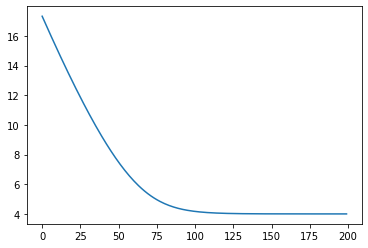

In [2]:
import random

# 定义误差函数 loss，它返回常数 0.2
def loss(x):
    return 0.2

# 定义非线性函数 non_lin，它返回输入值的平方根
def non_lin(x):
    return x ** 0.5

# 设置输入值 X 和目标输出值 Y，以及神经元的初始权重
X = 3
Y = 4
syn0 = 100

# 创建一个空列表 Y_list，用于保存每次训练后的输出值
Y_list = []

# 迭代 200 次进行训练
for iter in range(200):
    # 前向传播计算输出
    L0 = X
    L1 = non_lin(L0 * syn0)
    
    # 计算误差和误差的调整量
    L1_error = Y - L1
    L1_delta = L1_error * loss(X)
    
    # 更新神经元的权重
    syn0 += L1_delta
    
    # 将当前输出值加入 Y_list 列表中
    Y_list.append(L1)

# 导入 matplotlib 库，绘制 Y_list 列表的折线图
import matplotlib.pyplot as plt
plt.plot(Y_list)
plt.show()

给定输入的矩阵和输出，对其建立模型

<img src="MPL-3.png" width="720">

常规方法，解线性方程组：

<img src="MPL-4.png" width="720">

练习：用线性代数解二元一次方程组  
$$
\begin{cases}
x+2y=5 \\ 
2x+y=3 \\
\end{cases}
$$

In [4]:
import numpy as np
X = np.array([[1, 2],
              [2, 1]])
Y = np.array([[5], [3]])
# Y = np.array([[5, 3]]).T #或者这样写。T为矩阵的转置
A = np.mat(X).I # 矩阵的逆
R = np.dot(A,Y) # 矩阵乘积
print(A)
print(R)
print(np.dot(X,R))

[[-0.33333333  0.66666667]
 [ 0.66666667 -0.33333333]]
[[0.33333333]
 [2.33333333]]
[[5.]
 [3.]]


In [5]:
import numpy as np
X = np.array([[0, 0, 1],
              [1, 1, 1],
              [1, 0, 1],
              [0, 1, 1]])
Y = np.array([[0], [1], [1], [0]])
A = np.mat(X).I
R = np.dot(A,Y)
print(A)
print(R)
print(np.dot(X,R))

[[-0.5   0.5   0.5  -0.5 ]
 [-0.5   0.5  -0.5   0.5 ]
 [ 0.75 -0.25  0.25  0.25]]
[[ 1.00000000e+00]
 [ 0.00000000e+00]
 [-2.22044605e-16]]
[[-2.22044605e-16]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [-2.22044605e-16]]


### 两层的神经网络

In [6]:
import numpy as np
# sigmoid function
def nonlin(x, deriv=False):
    if(deriv == True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
# input dataset
X = np.array([[0, 0, 1],
              [1, 1, 1],
              [1, 0, 1],
              [0, 1, 1]])

# output dataset
Y = np.array([[0], [1], [1], [0]])
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(888)
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3, 1)) - 1
# network training
for iter in range(1000000):
    # forward propagation
    L0 = X
    L1 = nonlin(np.dot(L0, syn0))
    # how much did we miss?
    L1_error = Y - L1
    # multiply how much we missed by the
    # slope of the sigmoid at the values in L1
    L1_delta = L1_error * nonlin(L1, True)
    # update weights
    syn0 += np.dot(L0.T, L1_delta)
# print result
print("Output After Training:")
print(L1)

Output After Training:
[[9.50436268e-04]
 [9.99224081e-01]
 [9.99366721e-01]
 [7.75739705e-04]]


In [7]:
import numpy as np
# sigmoid function
def nonlin(x, deriv=False):
    if(deriv == True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
# input dataset
X = np.array([[0, 0, 1],
              [1, 1, 1],
              [1, 0, 1],
              [0, 1, 1]])
# output dataset
Y = np.array([[0, 1, 1, 0]]).T
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(888)
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3, 1)) - 1
# network training
for iter in range(100000):
    # forward propagation
    L0 = X
    L1 = nonlin(np.dot(L0, syn0))
    # how much did we miss?
    L1_error = Y - L1
    # multiply how much we missed by the
    # slope of the sigmoid at the values in L1
    L1_delta = L1_error * nonlin(L1, True)
    # update weights
    syn0 += np.dot(L0.T, L1_delta)
# print result
print("Output After Training:")
print(L1)

Output After Training:
[[0.00301773]
 [0.99753716]
 [0.99799176]
 [0.00246095]]


### 三层的神经网络

<img src="MPL-5.png" width="720">

In [14]:
import numpy as np
def nonlin(x, deriv=False):
    if(deriv == True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
Y = np.array([[0],[1],[1],[0]])
np.random.seed(888)
# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3, 4)) - 1
syn1 = 2*np.random.random((4, 1)) - 1
L2 = ""
for j in range(100000):
    # Feed forward through layers 0, 1, and 2
    l0 = X
    L1 = nonlin(np.dot(l0, syn0))
    L2 = nonlin(np.dot(L1, syn1))
    # how much did we miss the target value?
    L2_error = Y - L2
    if (j % 10000) == 0:
        print("Error:" + 
        str(np.mean(np.abs(L2_error))))
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    L2_delta = L2_error*nonlin(L2, deriv=True)
    # how much did each L1 value contribute to the L2 error 
    # (according to the weights)?
    L1_error = L2_delta.dot(syn1.T)
    # in what direction is the target L1?
    # were we really sure? if so, don't change too much.
    L1_delta = L1_error * nonlin(L1, deriv=True)
    syn1 += L1.T.dot(L2_delta)
    syn0 += l0.T.dot(L1_delta)
print(L2)

Error:0.49821125693514995
Error:0.010023549678564673
Error:0.00683836225852371
Error:0.0054931954540916005
Error:0.0047098651444234235
Error:0.004183183742241412
Error:0.0037985124246112745
Error:0.003501966563412986
Error:0.0032644780713787
Error:0.00306881776068467
[[0.0021324 ]
 [0.99696876]
 [0.99691498]
 [0.00336758]]


## sklearn中神经网络MLP算法的使用

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
X = wine.data[:,:2]
y = wine.target
#下面我们拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
#接下来定义分类器
mlp = MLPClassifier(solver='lbfgs')
mlp.fit(X_train, y_train)

MLPClassifier(solver='lbfgs')

solver是用来使loss最小化的优化方法，sklearn中有3种算法可以选择，分别是sgd, adam, lbfgs  
其他重要参数包括:
- activation: 非线性化的方法
- alpha: L2惩罚项
- hidden_layer_sizes: 默认是\[100,\],意思是只有一个隐藏层，节点数为100。如果定义为\[10,10\]，则有10个隐藏层，节点数是10

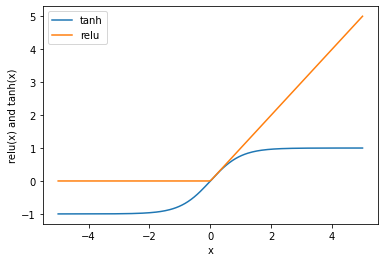

In [16]:
import numpy as np
import matplotlib.pyplot as plt
line = np.linspace(-5,5,200)
plt.plot(line, np.tanh(line),label='tanh')
plt.plot(line, np.maximum(line,0),label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x) and tanh(x)')
plt.show()

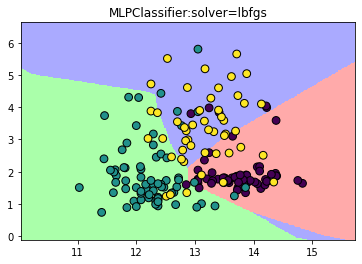

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:solver=lbfgs")

plt.show()

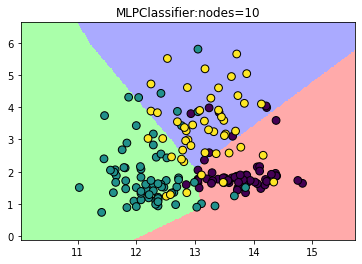

In [18]:
mlp_20=MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10])
mlp_20.fit(X_train, y_train)
Z1 = mlp_20.predict(np.c_[xx.ravel(), yy.ravel()])

Z1 = Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z1, cmap=cmap_light, shading='auto')

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:nodes=10")

plt.show()

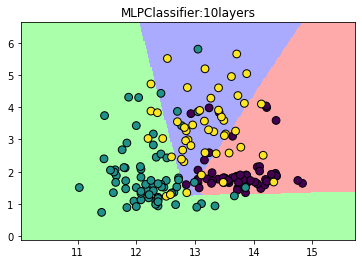

In [19]:
mlp_2L=MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10])
mlp_2L.fit(X_train, y_train)
Z1 = mlp_2L.predict(np.c_[xx.ravel(), yy.ravel()])

Z1 = Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z1, cmap=cmap_light,shading='auto')

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:10layers")

plt.show()

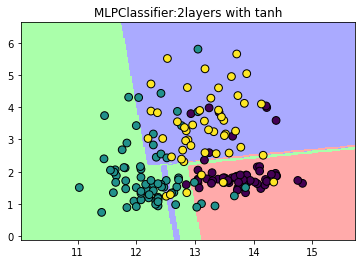

In [20]:
mlp_tanh=MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10], activation='tanh', max_iter = 1000000)
mlp_tanh.fit(X_train, y_train)
Z2 = mlp_tanh.predict(np.c_[xx.ravel(), yy.ravel()])

Z2 = Z2.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z2, cmap=cmap_light, shading='auto')

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:2layers with tanh")

plt.show()

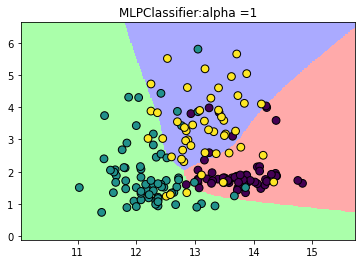

In [21]:
mlp_alpha=MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10],
                    activation='tanh',alpha=1, max_iter = 1000000)
mlp_alpha.fit(X_train, y_train)
Z3 = mlp_alpha.predict(np.c_[xx.ravel(), yy.ravel()])

Z3 = Z3.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z3, cmap=cmap_light, shading='auto')

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:alpha =1")

plt.show()

## 神经网络实例——手写数字识别
使用MNST数据集文件mnist_data.csv和mnist_target.csv。mnist_data.csv中包含了7万张手写数字图片，每张图片为28*28，每行是所有像素点反色的灰度值。


In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
#加载MNIST手写数字数据集
data = pd.read_csv("./mnist/mnist_data.csv", index_col = 0  )
target = pd.read_csv("./mnist/mnist_target.csv", index_col = 0)
print('样本数量：{}, 样本特征数：{}'.format(data.shape[0],
                                 data.shape[1]))

样本数量：70000, 样本特征数：784


In [2]:
display(data)
display(target)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [3]:
X = data/255
y = target['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 5000, test_size=100,random_state=62)

In [4]:
display(X_train[y_train==3][0:1]) #每一行是一张图片的全部像素点

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
50045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


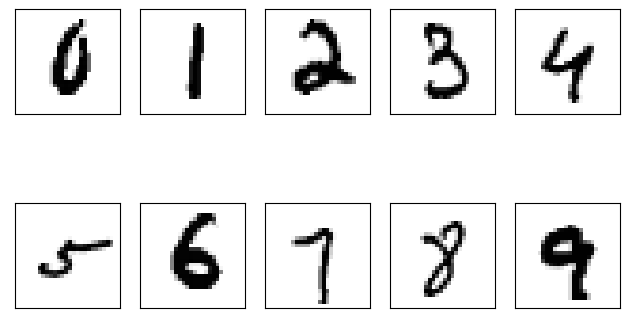

In [5]:
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )
 
ax = ax.flatten()
for i in range(10):
    img = np.array(X_train[y_train == i][0:1]).reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [6]:
mlp_hw = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[100,10],
                       activation='relu', alpha = 1e-5,random_state=62)
mlp_hw.fit(X_train,y_train)
print('测试数据集得分：{:.2f}%'.format(mlp_hw.score(X_test,y_test)*100))

测试数据集得分：90.00%


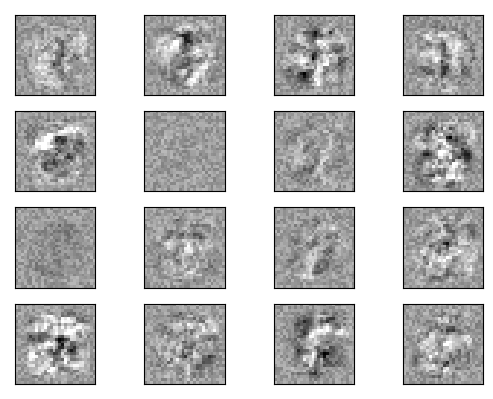

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
# 列表中的第i个元素表示i层的权重矩阵。
vmin, vmax = mlp_hw.coefs_[0].min(), mlp_hw.coefs_[0].max()
for coef, ax in zip(mlp_hw.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [9]:
from PIL import Image
import numpy as np
image=Image.open('test.jpg').convert('F')
image=image.resize((28,28))
image.show()
arr=[]
for i in range(28):
    for j in range(28):
        pixel = 1.0 - float(image.getpixel((j,i)))/255 #白色是255，做一次反色
        arr.append(pixel)
arr1 = np.array(arr).reshape(1,-1)
print(mlp_hw.predict(arr1)[0])

2


C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
